<a href="https://colab.research.google.com/github/Ant2965/Journey/blob/main/House%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt



In [2]:
df=pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0


In [3]:
df.shape


(3000, 9)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
df.shape


(3000, 9)

In [7]:
df2=df.dropna()
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
df2.shape

(3000, 9)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [10]:
features =['housing_median_age', 'total_rooms', 'total_bedrooms']
target='median_house_value'
x1=df2[features]
y1=df2[target]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)



In [12]:
model = LinearRegression()


In [13]:
# Training the model
model.fit(x_train, y_train)


LinearRegression()

In [14]:
acc=model.score(x_test,y_test)
print(acc)

0.12573348495550318


In [15]:
file = pd.read_csv("/content/sample_data/california_housing_train.csv")



In [16]:
file.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# New Section

In [17]:
file1 = file.drop(['longitude', 'latitude', 'median_income', 'population', 'households','median_house_value'],axis='columns')

In [18]:
file1.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms'], dtype='object')

In [19]:
output = model.predict(file1)

In [20]:

print(output)

[186492.57810158 177764.23889761 168109.57220377 ... 190308.87176048
 190127.74299206 249930.71106553]


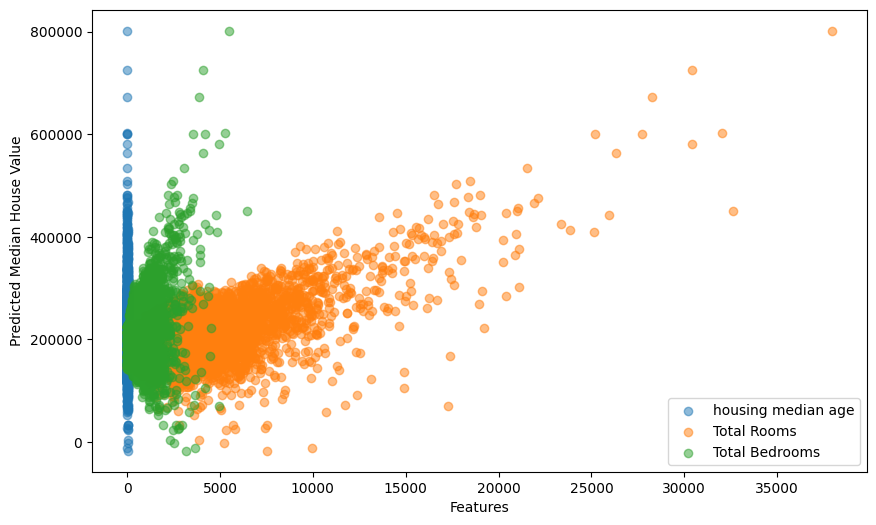

In [21]:
pt.figure(figsize=(10, 6))
pt.scatter(file1['housing_median_age'],output, label='housing median age', alpha=0.5)
pt.scatter(file1['total_rooms'],output, label='Total Rooms', alpha=0.5)
pt.scatter(file1['total_bedrooms'], output, label='Total Bedrooms', alpha=0.5)

# Add labels and legend
pt.xlabel('Features')
pt.ylabel('Predicted Median House Value')
pt.legend()

# Show the plot
pt.show()